In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os

In [5]:
# This allows us to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'INR'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-08-11T13:38:22.580Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10035}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6]:
data['data']

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 11631,
  'date_added': '2010-07-13T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio',
   'bitcoin-ecosystem',
   'ftx-bankruptcy-estate'],
  'max_sup

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973845e+07,1.973845e+07,False,NaN,1,NaN,NaN,None,2024-08-11T13:37:00.000Z,5.068043e+06,1.401172e+12,-33.8042,-0.123215,-0.534644,-0.854732,4.728189,-12.974737,-3.708127,1.000353e+14,56.4366,1.064289e+14,None,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
1,1027,Ethereum,ETH,ethereum,9203,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202678e+08,1.202678e+08,True,NaN,2,NaN,NaN,None,2024-08-11T13:36:00.000Z,2.206635e+05,8.720320e+11,-23.9297,-0.360956,0.280007,-9.847831,-15.223650,-27.298776,-11.485085,2.653872e+13,14.9663,2.653872e+13,None,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
2,825,Tether USDt,USDT,tether,93920,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-11T13:36:00.000Z,8.398212e+01,2.770057e+12,-23.2693,-0.034317,0.021446,0.081060,0.008109,0.033248,0.048441,9.711571e+12,5.4768,9.831625e+12,None,2024-08-11T13:37:03.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-11 19:08:22.330484
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459366e+08,1.459366e+08,False,NaN,4,NaN,NaN,None,2024-08-11T13:36:00.000Z,4.363453e+04,1.241986e+11,2.3054,-0.381031,0.923286,-1.286068,-1.674133,-17.060825,-12.572894,6.367874e+12,3.5925,6.367874e+12,None,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.666192e+08,5.819499e+08,True,NaN,5,NaN,NaN,None,2024-08-11T13:36:00.000Z,1.264844e+04,1.315855e+11,-38.5877,-0.862378,-2.099505,4.199301,9.400266,-5.389976,3.357287,5.902007e+12,3.3284,7.360762e+12,None,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
5,3408,USDC,USDC,usd-coin,21467,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.444954e+10,3.444954e+10,False,NaN,6,NaN,NaN,None,2024-08-11T13:36:00.000Z,8.395620e+01,2.480368e+11,-38.0241,-0.034626,0.008051,0.000470,-0.005096,-0.002413,-0.026315,2.892252e+12,1.6311,2.892252e+12,None,2024-08-11T13:37:03.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-11 19:08:22.330484
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-11T13:37:00.000Z,4.811367e+01,8.793015e+10,-22.5213,-0.188975,-4.434681,4.657811,22.884469,16.276440,13.405614,2.699387e+12,1.5223,4.811367e+12,None,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518453e+09,5.110330e+09,True,NaN,8,3.414167e+09,2.179748e+10,None,2024-08-11T13:36:00.000Z,5.359969e+02,2.095579e+10,-52.4686,-1.391141,-4.806861,3.963384,-12.036745,-11.262601,-11.730951,1.349883e+12,0.7611,2.739121e+12,None,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  15 non-null     int64         
 1   name                                15 non-null     object        
 2   symbol                              15 non-null     object        
 3   slug                                15 non-null     object        
 4   num_market_pairs                    15 non-null     int64         
 5   date_added                          15 non-null     object        
 6   tags                                15 non-null     object        
 7   max_supply                          5 non-null      float64       
 8   circulating_supply                  15 non-null     float64       
 9   total_supply                        15 non-null     float64       
 10  infinite_supply             

In [22]:
df.to_csv(r'.\CryptoAPI.csv', header='column_names', index=False, mode='w')

In [28]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'INR'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    if os.path.isfile(r'.\CryptoAPI.csv'):
        
        # df = pd.read_csv(r'.\CryptoAPI.csv')
        # df = pd.concat([df, df2], ignore_index=True)
        # df.to_csv(r'.\CryptoAPI.csv', header='column_names', index=False)
        
        df2.to_csv(r'.\CryptoAPI.csv', header=False, index=False, mode='a')
    else:
        df2.to_csv(r'.\CryptoAPI.csv', header='column_names', index=False)


In [29]:
import os 
from time import time
from time import sleep

for i in range(30):
    api_runner()
    print('API Runner completed')
    sleep(2) #sleep for 1 minute
# exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [3]:
df = pd.read_csv(r'.\CryptoAPI.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  675 non-null    int64  
 1   name                                675 non-null    object 
 2   symbol                              675 non-null    object 
 3   slug                                675 non-null    object 
 4   num_market_pairs                    675 non-null    int64  
 5   date_added                          675 non-null    object 
 6   tags                                675 non-null    object 
 7   max_supply                          225 non-null    float64
 8   circulating_supply                  675 non-null    float64
 9   total_supply                        675 non-null    float64
 10  infinite_supply                     675 non-null    bool   
 11  platform                            0 non-nul

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19738450.00000,19738450.00000,False,NaN,1,NaN,NaN,NaN,2024-08-11T13:37:00.000Z,5068043.03819,1401171889462.99097,-33.80420,-0.12321,-0.53464,-0.85473,4.72819,-12.97474,-3.70813,100035314107108.87500,56.43660,106428903801933.85938,NaN,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
1,1027,Ethereum,ETH,ethereum,9203,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120267845.85701,120267845.85701,True,NaN,2,NaN,NaN,NaN,2024-08-11T13:36:00.000Z,220663.48344,872031957242.75562,-23.92970,-0.36096,0.28001,-9.84783,-15.22365,-27.29878,-11.48508,26538721812649.94531,14.96630,26538721812650.21094,NaN,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
2,825,Tether USDt,USDT,tether,93920,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,115638558844.62656,117068077122.37192,True,NaN,3,NaN,NaN,NaN,2024-08-11T13:36:00.000Z,83.98212,2770057241405.80176,-23.26930,-0.03432,0.02145,0.08106,0.00811,0.03325,0.04844,9711570845113.80859,5.47680,9831624814718.86914,NaN,2024-08-11T13:37:03.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-11 19:08:22.330484
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145936567.86895,145936567.86895,False,NaN,4,NaN,NaN,NaN,2024-08-11T13:36:00.000Z,43634.53401,124198560786.89989,2.30540,-0.38103,0.92329,-1.28607,-1.67413,-17.06083,-12.57289,6367874134655.19629,3.59250,6367874134655.15918,NaN,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466619180.73488,581949947.94338,True,NaN,5,NaN,NaN,NaN,2024-08-11T13:36:00.000Z,12648.44436,131585479890.96822,-38.58770,-0.86238,-2.09950,4.19930,9.40027,-5.38998,3.35729,5902006746571.82812,3.32840,7360761539034.23047,NaN,2024-08-11T13:37:03.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:08:22.330484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1958,TRON,TRX,tron,1006,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,86987283682.00821,86987290781.25409,True,NaN,11,71659659264.00000,9197335037.68773,NaN,2024-08-11T13:55:00.000Z,10.77526,14710895556.75205,-34.19720,-0.00353,-0.85688,0.11034,-6.16902,9.69591,1.84009,937310872795.70459,0.52660,937310949292.20959,NaN,2024-08-11T13:55:02.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:27:11.992869
671,5805,Avalanche,AVAX,avalanche,761,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,395102867.62485,444449237.62485,False,NaN,12,NaN,NaN,NaN,2024-08-11T13:55:00.000Z,1807.90984,13249147279.82124,-3.93100,0.00127,-0.44771,-4.44738,-15.53459,-35.11653,-35.04446,714310361070.61230,0.40100,1294009150017.79126,NaN,2024-08-11T13:55:02.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-11 19:27:11.992869
672,5994,Shiba Inu,SHIB,shiba-inu,854,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589270365806984.87500,589519075648157.50000,False,NaN,13,NaN,NaN,NaN,2024-08-

In [11]:
df3 = df.groupby('name', sort=False)[['quote.INR.percent_change_1h','quote.INR.percent_change_24h','quote.INR.percent_change_7d','quote.INR.percent_change_30d','quote.INR.percent_change_60d','quote.INR.percent_change_90d']].mean()
df3

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Toncoin,Dogecoin,Cardano,TRON,Avalanche,Shiba Inu,Polkadot,Bitcoin Cash
quote.INR.percent_change_1h,0.24880,0.39613,-0.02445,0.27829,0.35391,-0.03089,0.03180,-0.54370,0.26309,-0.05646,0.04510,0.08908,-0.07770,0.01668,-0.01928
quote.INR.percent_change_24h,0.00256,0.98446,0.05712,1.71098,-1.05302,0.03886,-3.37673,-4.11075,2.85627,-0.15630,-0.82183,-0.39247,-0.21998,-1.50784,-2.88670
quote.INR.percent_change_7d,-0.52696,-9.40356,0.12325,-0.52876,5.17709,0.03592,5.28308,4.20267,-0.48909,-3.64487,0.18679,-4.39857,-0.94279,-4.50542,-1.62462
quote.INR.percent_change_30d,4.79458,-15.19442,0.04915,-1.23049,9.55652,0.02881,23.21143,-11.82907,-0.07895,-15.48364,-6.07289,-15.47104,-13.88044,-21.27624,-0.90027
quote.INR.percent_change_60d,-12.66459,-26.91078,0.06784,-16.67945,-4.77899,0.02251,16.60262,-11.43135,-26.63630,-21.48874,9.73592,-35.14814,-37.99992,-29.42890,-24.48833
quote.INR.percent_change_90d,-3.57476,-11.12724,0.09810,-12.13325,3.98238,0.01390,13.77389,-11.80121,-27.59895,-22.63282,1.85339,-35.05958,-41.53485,-30.37956,-21.42272


In [13]:
df3.transpose()

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Toncoin,Dogecoin,Cardano,TRON,Avalanche,Shiba Inu,Polkadot,Bitcoin Cash
quote.INR.percent_change_1h,0.24880,0.39613,-0.02445,0.27829,0.35391,-0.03089,0.03180,-0.54370,0.26309,-0.05646,0.04510,0.08908,-0.07770,0.01668,-0.01928
quote.INR.percent_change_24h,0.00256,0.98446,0.05712,1.71098,-1.05302,0.03886,-3.37673,-4.11075,2.85627,-0.15630,-0.82183,-0.39247,-0.21998,-1.50784,-2.88670
quote.INR.percent_change_7d,-0.52696,-9.40356,0.12325,-0.52876,5.17709,0.03592,5.28308,4.20267,-0.48909,-3.64487,0.18679,-4.39857,-0.94279,-4.50542,-1.62462
quote.INR.percent_change_30d,4.79458,-15.19442,0.04915,-1.23049,9.55652,0.02881,23.21143,-11.82907,-0.07895,-15.48364,-6.07289,-15.47104,-13.88044,-21.27624,-0.90027
quote.INR.percent_change_60d,-12.66459,-26.91078,0.06784,-16.67945,-4.77899,0.02251,16.60262,-11.43135,-26.63630,-21.48874,9.73592,-35.14814,-37.99992,-29.42890,-24.48833
quote.INR.percent_change_90d,-3.57476,-11.12724,0.09810,-12.13325,3.98238,0.01390,13.77389,-11.80121,-27.59895,-22.63282,1.85339,-35.05958,-41.53485,-30.37956,-21.42272


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.INR.percent_change_1h      0.24880
              quote.INR.percent_change_24h     0.00256
              quote.INR.percent_change_7d     -0.52696
              quote.INR.percent_change_30d     4.79458
              quote.INR.percent_change_60d   -12.66459
                                                ...   
Bitcoin Cash  quote.INR.percent_change_24h    -2.88670
              quote.INR.percent_change_7d     -1.62462
              quote.INR.percent_change_30d    -0.90027
              quote.INR.percent_change_60d   -24.48833
              quote.INR.percent_change_90d   -21.42272
Length: 90, dtype: float64

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.INR.percent_change_1h    0.24880
             quote.INR.percent_change_24h   0.00256
             quote.INR.percent_change_7d   -0.52696
             quote.INR.percent_change_30d   4.79458
             quote.INR.percent_change_60d -12.66459
...                                             ...
Bitcoin Cash quote.INR.percent_change_24h  -2.88670
             quote.INR.percent_change_7d   -1.62462
             quote.INR.percent_change_30d  -0.90027
             quote.INR.percent_change_60d -24.48833
             quote.INR.percent_change_90d -21.42272

[90 rows x 1 columns]

In [18]:
df6 = df5.reset_index()

In [20]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.INR.percent_change_1h,0.24880
1,Bitcoin,quote.INR.percent_change_24h,0.00256
2,Bitcoin,quote.INR.percent_change_7d,-0.52696
3,Bitcoin,quote.INR.percent_change_30d,4.79458
4,Bitcoin,quote.INR.percent_change_60d,-12.66459
...,...,...,...
85,Bitcoin Cash,quote.INR.percent_change_24h,-2.88670
86,Bitcoin Cash,quote.INR.percent_change_7d,-1.62462
87,Bitcoin Cash,quote.INR.percent_change_30d,-0.90027
88,Bitcoin Cash,quote.INR.percent_change_60d,-24.48833


In [23]:
df7['percent_change'] = df7['percent_change'].replace(['quote.INR.percent_change_1h', 'quote.INR.percent_change_24h','quote.INR.percent_change_7d','quote.INR.percent_change_30d','quote.INR.percent_change_60d','quote.INR.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.24880
1,Bitcoin,24h,0.00256
2,Bitcoin,7d,-0.52696
3,Bitcoin,30d,4.79458
4,Bitcoin,60d,-12.66459
...,...,...,...
85,Bitcoin Cash,24h,-2.88670
86,Bitcoin Cash,7d,-1.62462
87,Bitcoin Cash,30d,-0.90027
88,Bitcoin Cash,60d,-24.48833


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

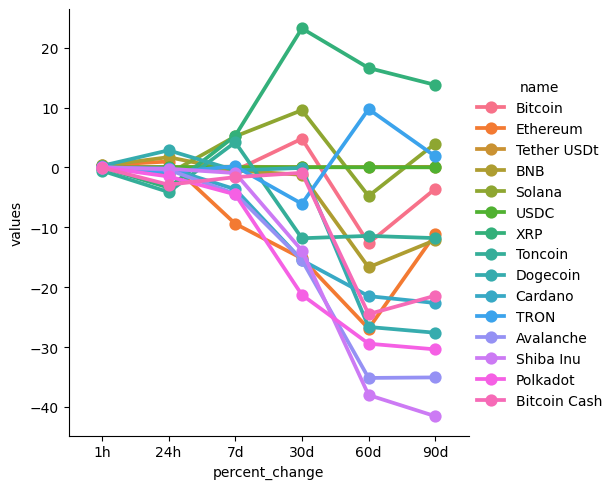

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [27]:
df10 = df[['name','quote.INR.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.INR.price,timestamp
0,Bitcoin,5068043.03819,2024-08-11 19:08:22.330484
15,Bitcoin,5088690.48002,2024-08-11 19:24:04.365364
30,Bitcoin,5088690.48002,2024-08-11 19:24:07.002441
45,Bitcoin,5088690.48002,2024-08-11 19:24:09.608188
60,Bitcoin,5088690.48002,2024-08-11 19:24:12.631696
...,...,...,...
600,Bitcoin,5083449.97428,2024-08-11 19:26:56.641266
615,Bitcoin,5083449.97428,2024-08-11 19:26:59.830361
630,Bitcoin,5083449.97428,2024-08-11 19:27:02.652093
645,Bitcoin,5083449.97428,2024-08-11 19:27:05.833405


<Axes: xlabel='timestamp', ylabel='quote.INR.price'>

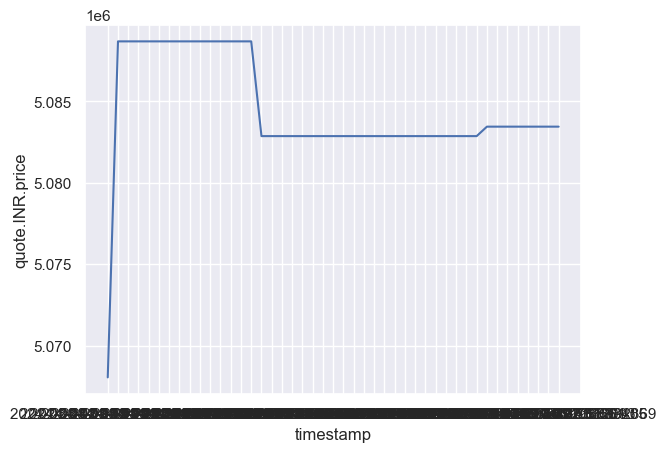

In [28]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.INR.price', data = df10)

In [32]:
dfT = df3.transpose()

<Axes: >

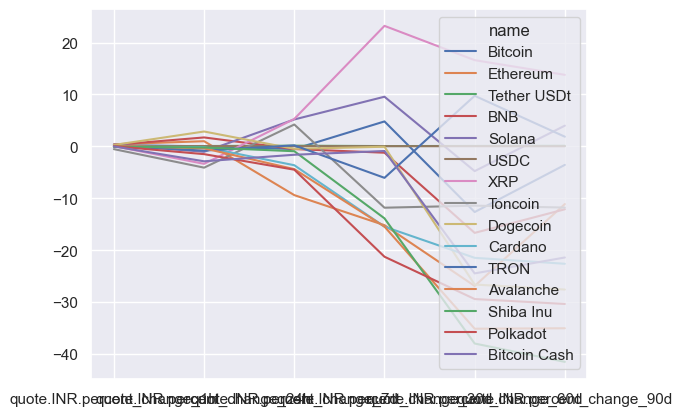

In [33]:
dfT.plot()